In [1]:
from turtle import pd

In [2]:
import numpy as np
import scipy
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
def main():
    iris = datasets.load_iris()
    iris_as_matrix = np.concatenate((iris.data[:, :4], np.reshape(iris.target, (150,1))), axis=1)
    sepal_length = iris.data[:, :1]
    sepal_width = iris.data[:, 1:2]
    petal_length = iris.data[:, 2:3]
    petal_width = iris.data[:, 3:4]
    y = iris.target

    # Plotting two set of features and the class they belong to
    # 0 represents setosa class, #1 represents versicolor, #2 represents virginica
    def plot():
        scatter = plt.scatter(petal_length, sepal_length, c=y)
        plt.xlabel('Petal length')
        plt.ylabel('Sepal length')
        plt.legend(*scatter.legend_elements(), loc="upper left")
        plt.show()
        scatter = plt.scatter(petal_length, sepal_width, c=y)
        plt.xlabel('Petal length')
        plt.ylabel('Sepal width')
        plt.legend(*scatter.legend_elements(), loc="upper right")
        plt.show()
        scatter = plt.scatter(petal_width, sepal_length, c=y)
        plt.xlabel('Petal width')
        plt.ylabel('Sepal length')
        plt.legend(*scatter.legend_elements(), loc="upper left")
        plt.show()
        scatter = plt.scatter(petal_width, sepal_width, c=y)
        plt.xlabel('Petal width')
        plt.ylabel('Sepal width')
        plt.legend(*scatter.legend_elements(), loc="upper right")
        plt.show()
        scatter = plt.scatter(petal_length, petal_width, c=y)
        plt.xlabel('Petal length')
        plt.ylabel('Petal width')
        plt.legend(*scatter.legend_elements(), loc="upper left")
        plt.show()
        scatter = plt.scatter(sepal_length, sepal_width, c=y)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.legend(*scatter.legend_elements(), loc="upper left")
        plt.show()

    # Sorting
    def sort(dataset, x, y):
        # stores observations that with feature value less than the pivot.
        less_dataset = np.array([], dtype=np.int64).reshape(0, 5)
        # stores observations that with feature value equal to the pivot.
        equal_to = np.array([], dtype=np.int64).reshape(0, 5)
        # stores observations that with feature value greater than the pivot.
        greater_dataset = np.array([], dtype=np.int64).reshape(0, 5)

        # array that takes in the feature values to be sorted.
        array = dataset[:, x:y]

        # checking for the array length
        if len(array) <= 1:
            return dataset
        else:
            # selecting a pivot value
            pivot = array[0]
        for index in range(len(array)):
            # store observations accordingly
            if array[index] > pivot:
                greater_dataset = np.vstack([greater_dataset, dataset[index]])
            elif array[index] < pivot:
                less_dataset = np.vstack([less_dataset, dataset[index]])
            else:
                equal_to = np.vstack([equal_to, dataset[index]])
        #recursive call
        return np.vstack([sort(less_dataset, x, y), equal_to, sort(greater_dataset, x, y)])
    """
        Input:
        datamatrix - multivariate data matrix. 
 
        Output: 
        Prints the outlier indices and the outliers.
        returns: datamatrix after the removal of outliers. 
        """
    # Outlier removal
    def outlier_remover(datamatrix):
        mean = np.mean(datamatrix, axis=0)
        difference = datamatrix - mean
        covarianceMatrix = np.cov(np.transpose(datamatrix))
        inverseCovMatrix = np.linalg.inv(covarianceMatrix)
        D = []
        for i in range(len(difference)):
            D.append(np.sqrt(difference[i].dot(inverseCovMatrix).dot(difference[i])))
        sd =np.std(D)
        m = np.mean(D)
        upper_limit = m + 2*sd
        lower_limit = m - 2*sd
        outlierindices = []
        outliers = np.array([], dtype=np.int64).reshape(0, 4)
        for i in range(len(D)):
            if (D[i] >= upper_limit) or (D[i] <= lower_limit):
                outlierindices.append(i)  # index of the outlier
        for j in outlierindices:
            outliers = np.vstack([outliers, datamatrix[j]])
        outliersremoved = np.delete(datamatrix, outlierindices, axis=0)
        print("Outlier indices: ", '\n', outlierindices)
        print("Outliers: ", '\n', outliers)
        print("Dataset after the removal of outliers: ")
        return outliersremoved
    def plot_2features(x,y):
        plt.scatter(sepal_length[x:y, :], petal_length[x:y, :])
        plt.xlabel('Petal length')
        plt.ylabel('Sepal length')
        plt.show()
        plt.scatter(sepal_width[x:y, :], petal_length[x:y, :])
        plt.xlabel('Petal length')
        plt.ylabel('Sepal width')
        plt.show()
        plt.scatter(petal_width[x:y, :], petal_length[x:y, :])
        plt.xlabel('Petal length')
        plt.ylabel('Petal width')
        plt.show()
        plt.scatter(sepal_length[x:y, :], petal_width[x:y, :])
        plt.xlabel('Petal width')
        plt.ylabel('Sepal length')
        plt.show()
        plt.scatter(sepal_width[x:y, :], petal_width[x:y, :])
        plt.xlabel('Petal width')
        plt.ylabel('Sepal width')
        plt.show()
        plt.scatter(sepal_length[x:y, :], sepal_width[x:y, :])
        plt.xlabel('Sepal width')
        plt.ylabel('Sepal length')
        plt.show()

    #Feature Ranking implemented from the Matlab code.
    def fishersMultiClassFeatureRanking(datamatrix, targets, method):
        # collecting the dimensions of number of classes and features
        maxClassDim = max(targets) + 1
        vDim = len(datamatrix[0])

        # checking for "method" input. Default is 1
        if method < 1 or method > 4:
            method = 1

        # mean of each class
        mean_setosa = np.mean(datamatrix[:50,:], axis=0)
        mean_versicolor = np.mean(datamatrix[50:100,:], axis=0)
        mean_virginica = np.mean(datamatrix[100:150, :], axis=0)
        # means of all the classes stacked together
        mean = np.vstack([mean_setosa, mean_versicolor, mean_virginica])

        # Standard deviation of each class
        sd_setosa = np.std(datamatrix[:50, :], axis=0)
        sd_versicolor = np.std(datamatrix[50:100, :], axis=0)
        sd_virginica = np.std(datamatrix[100:150, :], axis=0)
        # sd of all the classes stacked together
        sd = np.vstack([sd_setosa, sd_versicolor, sd_virginica]).sum(axis=0)

        # Mean over sd
        mosd = np.transpose(mean/sd)
        indTempt = np.array([], dtype=np.int64).reshape(0, 4)
        corrTempt = np.array([], dtype=np.int64).reshape(0, 4)
        indTemp = []
        corrTemp = []
        for j in range(maxClassDim):
            # delete the ith column
            WW = np.delete(mosd, [j], axis=1)
            # difference in the mean/sd after reshaping
            WW = np.transpose(np.ones((2,4))*mosd[:, j]) - WW
            # Implementing the method inputted.
            if method == 1:
                #minimum
                rankW = np.min(WW, axis=1)
            elif method == 2:
                #maximum
                rankW = np.max(WW, axis=1)
            elif method == 3:
                #summation
                rankW = np.sum(WW, axis=1)
            else:
                #average
                rankW = ((np.min(WW, axis=1)) + (np.max(WW, axis=1)))/2
            u = np.sort(-1*np.abs(rankW))
            v = np.argsort(-1*np.abs(rankW))
            indTempt = np.vstack([indTempt, v])
            indTemp = np.transpose(indTempt)
            corrTempt = np.vstack([corrTempt, u])
            corrTemp = np.transpose(corrTempt)
        indTemp = indTemp.reshape(1, vDim*maxClassDim)
        corrTemp = corrTemp.reshape(1, vDim*maxClassDim)
        corrTemp = corrTemp.reshape(1, vDim*maxClassDim)
        corrSort = np.sort(corrTemp)
        indx = np.argsort(corrTemp)
        indSort = indTemp[:, indx]
        indTemp = np.flip(indSort)
        corrTemp = np.flip(corrSort)
        [u,v] = np.unique(indTemp, return_index=True)
        w = np.sort(v)
        s = np.argsort(v)
        values = np.flip(corrTemp[:, w])
        rankIndx = np.flip(u[s])
        print("Ranked Feature indices: ", rankIndx)
        print("Values used in Ranking the Feature: ", values)
    if val == "1":
        plot()
    elif val == "2":
        print("Sorting using the sepal length feature: ", '\n', sort(iris_as_matrix, 0, 1))
        print("Sorting using the sepal width feature: ", '\n', sort(iris_as_matrix, 1, 2))
        print("Sorting using the petal length feature: ", '\n', sort(iris_as_matrix, 2, 3))
        print("Sorting using the petal width feature: ", '\n', sort(iris_as_matrix, 3, 4))
    elif val == "3":
        print(outlier_remover(iris.data))
    elif val == "4":
        plot_2features(0, 50)
        plot_2features(50, 100)
        plot_2features(100, 150)
    elif val == "5":
        fishersMultiClassFeatureRanking(iris.data, iris.target, 1)

In [5]:
if __name__ == '__main__':
    print("Which function do you want to run?")
    print("1. Visually see two sets of features and the class they belong to")
    print("2. Sorting")
    print("3. Outlier Removal")
    print("4. Plot each class individually two features at a time")
    print("5. Feature Ranking")
    val = input("Enter your choice: ")
    main()

Which function do you want to run?
1. Visually see two sets of features and the class they belong to
2. Sorting
3. Outlier Removal
4. Plot each class individually two features at a time
5. Feature Ranking
Enter your choice: 3
Outlier indices:  
 [41, 78, 106, 114, 117, 131, 134, 141]
Outliers:  
 [[4.5 2.3 1.3 0.3]
 [6.  2.9 4.5 1.5]
 [4.9 2.5 4.5 1.7]
 [5.8 2.8 5.1 2.4]
 [7.7 3.8 6.7 2.2]
 [7.9 3.8 6.4 2. ]
 [6.1 2.6 5.6 1.4]
 [6.9 3.1 5.1 2.3]]
Dataset after the removal of outliers: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0

 # Visually see two sets of features and the class they belong to (Input option 1)

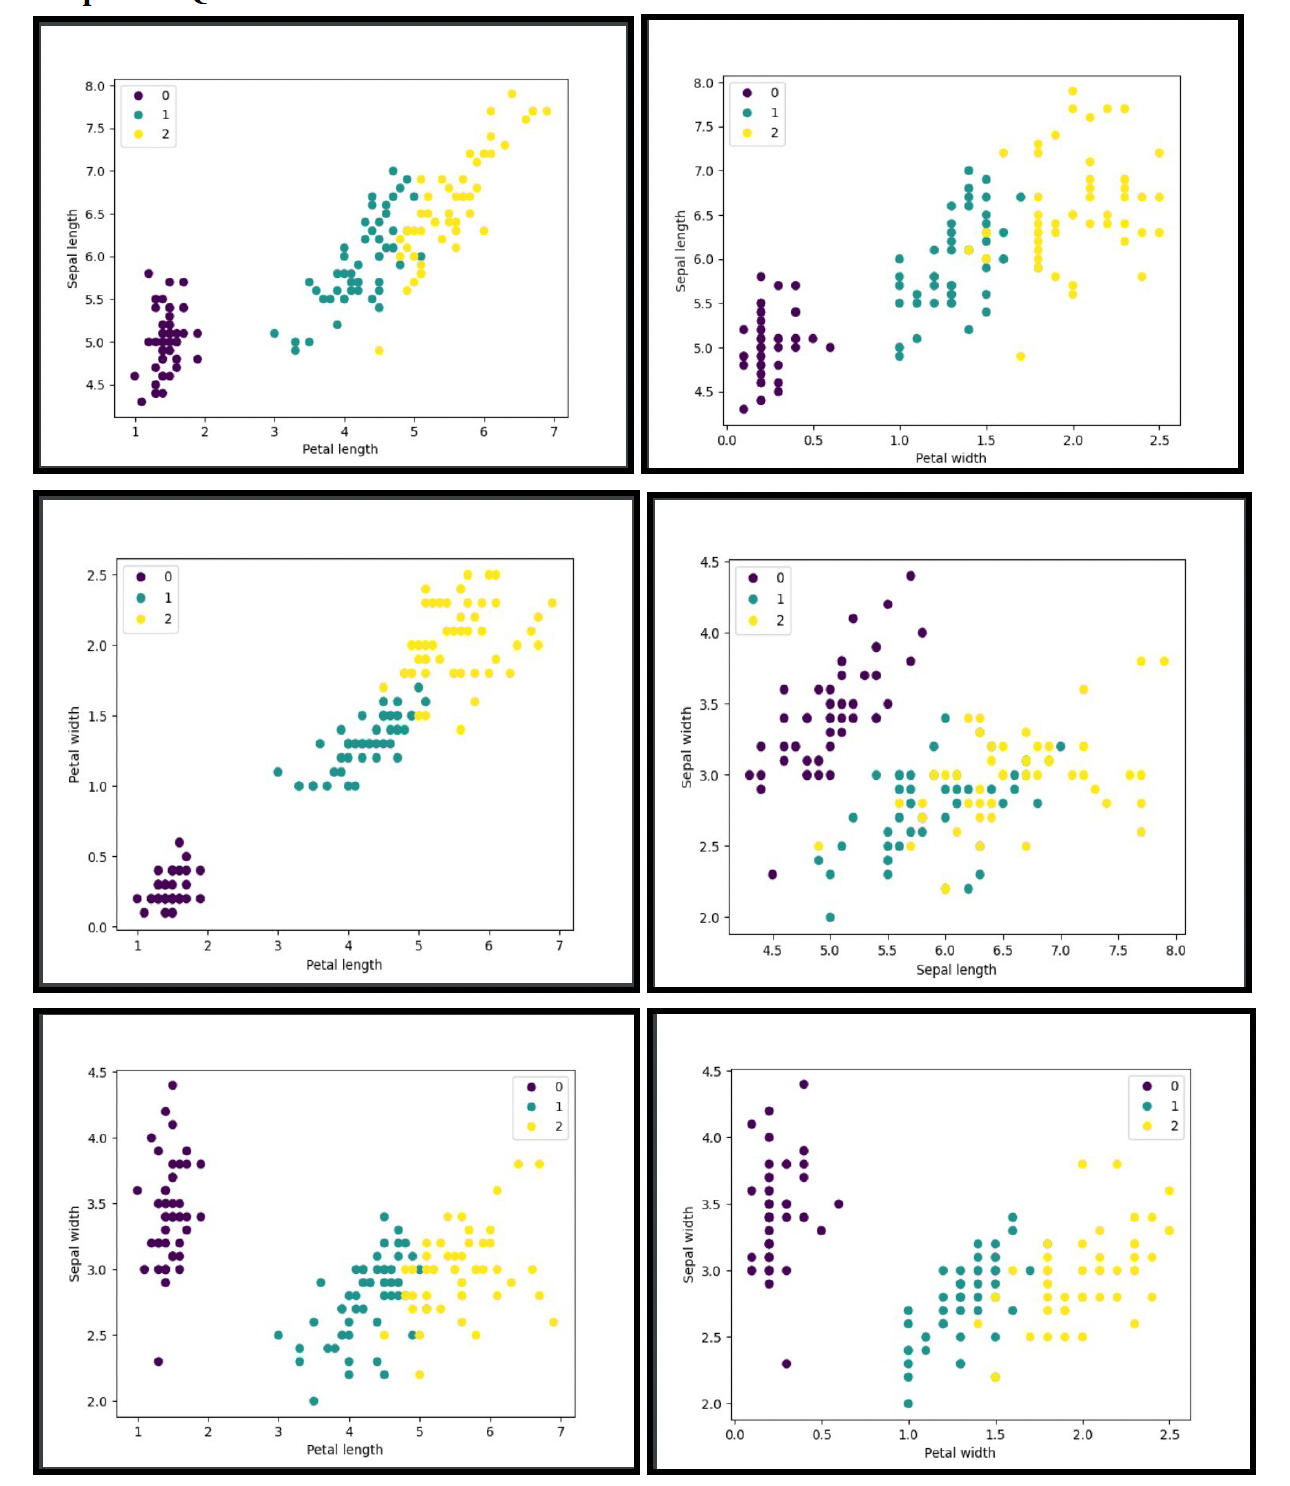

# Sorting (Input option 2):

Analysis:
Petal Width is the feature that best separates the plant types (All the Sentosa’s are together and
only 3 Virginica’s are in place of Versicolor). Petal length would be a close contender as well. I
chose Petal Width over Petal length because Petal Width separates the data in a better way from
observation 104 -110 (All other observations are separated the same way in both of these
features). Sorting by petal length leads to more Virginica’s that are longer than Versicolor which
interrupts the separation.

# Outlier Analysis:

Determining if the data contains an outlier by plotting each class individually, the key is
to plot two features at a time n different combinations, e.g., feature 1 vs feature 2, etc.

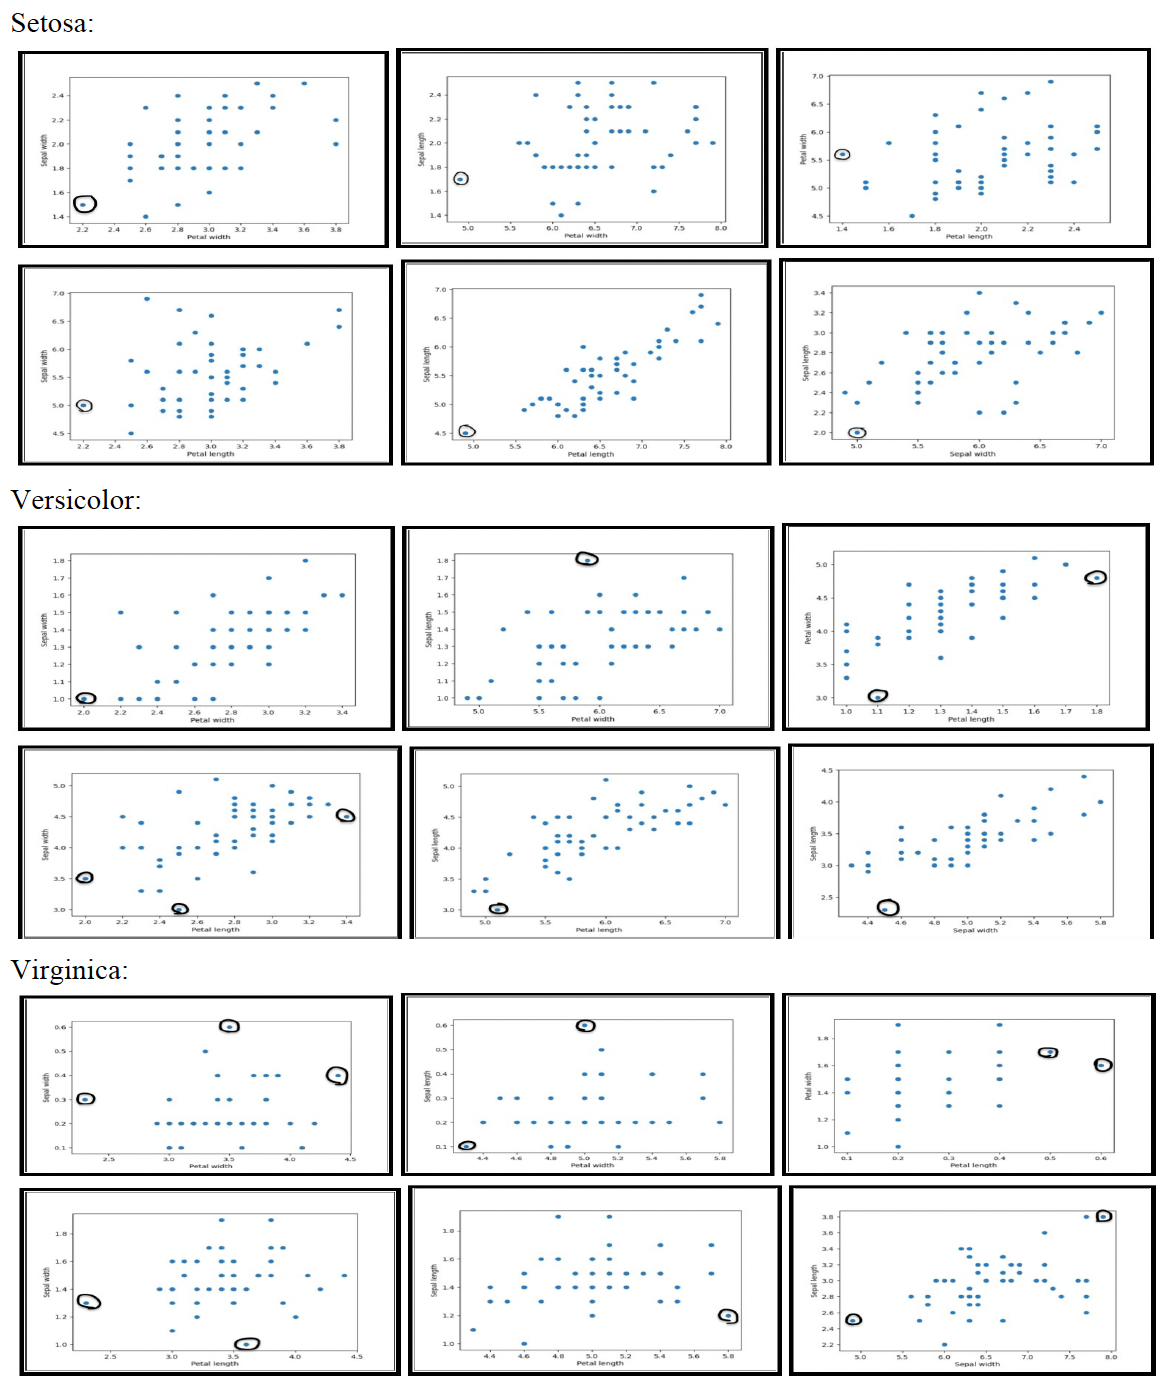

All the classes did have some obvious outliers. I would say especially Virginica as the outliers
were further apart from the rest of the data. All the outliers I marked were determined using how
they are outside of the most common range of the x and y values when plotted.

## Outlier removal (Input Option 3):

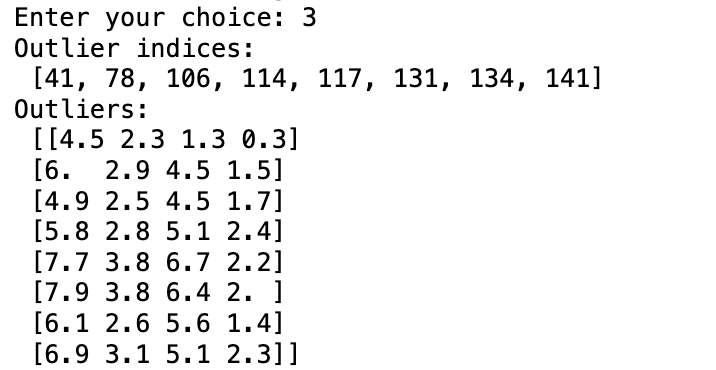


# Feature Analysis:

## i. Was there any feature that could separate the plant types; if so why, if not why not?
Petal Width and Petal length could separate the plant types for the most part but not perfectly.
Setosa class was perfectly separated because of the flower’s small petals nature. The range of the
flower’s petal length/petal width doesn’t overlap with the flowers of the other classes.
Petal Width and Petal length are also good features to separate because the difference in the
average petal dimensions of each of the flowers varies by a decent amount.


## ii. What was the metric used to determine separation? Explain why the metric was chosen.
I looked at the target values/labels of classes to determine separation. I also looked at the number
of flowers from each class that ended up where they don’t belong. For example, looking at how
many virginica’s have greater dimensions than Versicolor helped me determine separation. I
chose this metric because I know on average the dimensions of the flowers increase in ascending
order (Setosa < Versicolor < Virginica).

## iii. Was there any feature that could separate the plant types; if so why, if not why not?
Yes, Petal Width does a good job separating most of the data. It isn’t possible to perfectly
separate the data as there is some overlap between the range of a flower’s petal width for each
class. Petal Width has the least overlap of data between classes. It perfectly separated setosa
class and for versicolor and virginica the overlap is (1.4 (min for virginica) - 1.8 (max for
versicolor)).

## iv. If a feature could not separate the plant types; what conclusion can draw from this feature?
If a feature could not separate the plant types that means there is a good amount of overlap in the
measurements of the feature for that specific feature. For example sepal length has an overlap of
4.3units - 5.8units in all three classes. The averages 5 (setosa), 5.9 (versicolor), 6.5 (virginica) for
that feature are also considerably close.

## v. Can a metric be developed to complement the ranking method? 

Yes, there can be a metric to complement the ranking method. We can look for the percentage of
features that separate well after separation and rank the features based on the percentages.